## Experiment 3 Linear regression - a simple Neural Network
.<center>
**Course Name:** Deep learning with python<center>
**Experiment Name:** Data Visualization<center>
**Major:** Computer Science and Technology<center>
**Class:** <center>
**Student Name:** Reeshad Khan<center>
**Student ID:** 2019124921<center>
**Lab:** Computer Room <center> 
**Date:** 2020/05/02 <center>

### Task

This first part will cover:<br>
* A very simple neural network<br>
* Concepts such as target function and cost function<br>
* Gradient descent optimisation<br>

All this will be illustrated with the help of the simplest neural network possible: a 1 input 1 output linear regression model
that has the goal to predict the target value t from the input value x. The network is defined as having an input x which
gets transformed by the weight w to generate the output y by the formula y=x*w, and where y needs to approximate
the targets t as good as possible as defined by a cost function. This network can be represented graphically as:<br>
In regular neural networks, we typically have multiple layers, non-linear activation functions, and a bias for each node. In
this tutorial, we only have one layer with one weight parameter w, no activation function on the output, and no bias. In
simple linear regression the parameter w and bias are typically combined into the parameter vector B where bias is the
y-intercept and is the slope of the regression line. In linear regression, these parameters are typically fitted via the least
squares method.<br>
In this tutorial, we will approximate t the targets with the outputs of the model y by minimizing the squared error cost
function (= squared Euclidian distance). The squared error cost function is defined as ||t-y||^2. The minimization of the
cost will be done with the gradient descent optimization algorithm which is typically used in training of neural networks.

### 1. importing the libraries

In [1]:
%matplotlib notebook

import sys
import numpy as np  # Matrix and vector computation package
import matplotlib
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Fancier plots

# Set seaborn plotting style
sns.set_style('darkgrid')
# Set the seed for reproducability
np.random.seed(seed=13)

### 2. Define the target function
In this example, the targets $\mathbf{t}$ will be generated from a function $f$ and additive Gaussian noise(http://en.wikipedia.org/wiki/Normal_distribution) sampled from $\mathcal{N}(0, 0.2)$, where $\mathcal{N}$ is the normal distribution with mean 0 and variance 0.2. $f$ is defined as $f(x) = 2 x$, with $\mathbf{x}$ the input samples, slope $2$ and intercept $0$. $\mathbf{t}$ is $f(\mathbf{x}) + \mathcal{N}(0, 0.2)$. 

We will sample 20 input samples $\mathbf{x}$ from the uniform distribution between 0 and 1, and then generate the target output values $\mathbf{t}$ by the process described above. These resulting inputs $\mathbf{x}$ and targets $\mathbf{t}$ are plotted against each other in the figure below together with the original $f(x)$ line without the gaussian noise.
Note that $\mathbf{x}$ is a vector of individual input samples $x_i$, and that $\mathbf{t}$ is a corresponding vector of target values $t_i$.

In [2]:
# Define the vector of input samples as x, with 20 values 
# sampled from a uniform distribution between 0 and 1
x = np.random.uniform(0, 1, 20)

# Generate the target values t from x with small gaussian noise 
# so the estimation won't be perfect.
# Define a function f that represents the line that generates t 
# without noise.
def f(x): 
    return x * 2

# Create the targets t with some gaussian noise
noise_variance = 0.2 # Variance of the gaussian noise
# Gaussian noise error for each sample in x
noise = np.random.randn(x.shape[0]) * noise_variance
# Create targets t
t = f(x) + noise

### 3. Plot target function



<IPython.core.display.Javascript object>


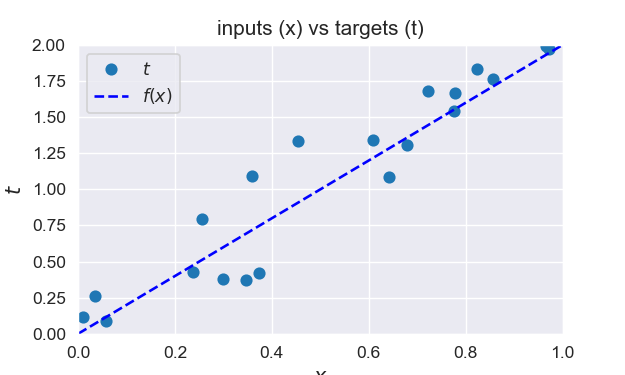

In [3]:
# Plot the target t versus the input x
plt.figure(figsize=(5, 3))
plt.plot(x, t, 'o', label='$t$')
# Plot the initial line
plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.axis((0, 1, 0, 2))
plt.title('inputs (x) vs targets (t)')
plt.legend(loc=2)
plt.show()

### 4. Define the cost function

We will optimize the model $\mathbf{y} = \mathbf{x} * w$ by tuning parameter $w$ so that the squared error cost along all samples is
minimized. The squared error cost is defined as $\xi = \frac{1}{N} \sum_{i=1}^{N} \Vert t_i - y_i \Vert ^2$, with $N$ the number of samples in the training set.<br>The optimization goal is thus:  $\underset{w}{\text{argmin}} \frac{1}{N} \sum_{i=1}^{N} \Vert t_i - y_i \Vert^2$.   
Notice that we take the mean of errors over all samples, which is known as batch training. We could also update the parameters based upon one sample at a time, which is known as online training.

This loss function for variable $w$ is plotted in the figure below. The value $w=2$ is at the minimum of the loss function (bottom of the parabola), this value is the same value as the slope we choose for $f(x)$. Notice that this function is convex and that there is only one minimum: the global minimum. While every squared error loss function for linear regression is convex, this is not the case for other models and other loss functions.

The neural network model is implemented in the `nn(x, w)` function, and the loss function is implemented in the `loss(y, t)` function.

In [10]:
def nn(x, w):
    """Output function y = x * w"""
    return x * w


def cost(y, t):
    """MSE cost function"""
    return np.mean((t - y)**2)

### 5. Plot the cost function

<IPython.core.display.Javascript object>


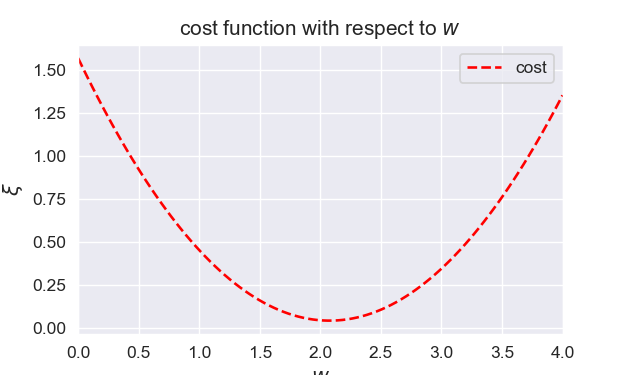

In [11]:
# Plot the cost vs the given weight w

# Vector of weights for which we want to plot the cost
ws = np.linspace(0, 4, num=100)  # weight values
# cost for each weight in ws
cost_ws = np.vectorize(lambda w: cost(nn(x, w) , t))(ws)

# Plot
plt.figure(figsize=(5, 3))
plt.plot(ws, cost_ws, 'r--', label='cost')
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('cost function with respect to $w$')
plt.xlim(0, 4)
plt.legend()
plt.show()

## 6. Optimizing the cost function
For a simple loss function like in this example, you can see easily what the optimal weight should be. However, in practice the error surface can be quite complex with many hills and valleys, or have a high dimensionality (each parameter adds a new dimension). This is why we use optimization techniques like gradient descent to find the minimum of the error function.

## 6.1 Gradient descent
One optimization algorithm commonly used to train neural networks is the gradient descent algorithm works by taking the gradient derivative of the cost function $\xi$ with respect to the parameters at a specific position on this cost function, and updates the parameters in the direction of the negative gradient (down along the loss function).
The parameter $w$ is iteratively updated by taking steps proportional to the negative of the gradient:
$$
w(k+1) = w(k) - \Delta w(k)
$$

With $w(k)$ the value of $w$ at iteration $k$ during the gradient descent.  
$\Delta w$ is defined as:
$$
\Delta w = \mu \frac{\partial \xi}{\partial w}
$$

With $\mu$ the learning rate, which is how big of a step you take along the gradient, and ${\partial \xi}/{\partial w}$ the gradient of the loss function $\xi$ with respect to the weight $w$. For each sample $i$ this gradient can be splitted according to the chain rule into:

$$
\frac{\partial \xi_i}{\partial w} = \frac{\partial \xi_i}{\partial y_i} \frac{\partial y_i}{\partial w}
$$

Where $\xi_i$ is the squared error cost, so the ${\partial \xi_i}/{\partial y_i}$ term can be written as:

$$
\frac{\partial \xi_i}{\partial y_i} = \frac{\partial (t_i - y_i)^2}{\partial y_i} = - 2 (t_i - y_i) = 2 (y_i - t_i)
$$

And since $y_i = x_i \cdot w$ we can write ${\partial y_i}/{\partial w}$ as:

$$
\frac{\partial y_i}{\partial w} = \frac{\partial (x_i \cdot w)}{\partial w} = x_i
$$

So the full update function $\Delta w$ for sample $i$ will become:

$$
\Delta w = \mu \cdot \frac{\partial \xi_i}{\partial w} = \mu \cdot 2 x_i (y_i - t_i)
$$

In the batch processing, we just add up all the gradients for each sample:

$$
\Delta w = \mu * 2 * \frac{1}{N} \sum_{i=1}^{N} x_i (y_i - t_i)
$$

The gradient descent algorithm is typically initialised by starting with random initial parameters. After initiating these parameters we can start updating these parameters with $\Delta w$ until convergence. The learning rate needs to be tuned separately as a hyperparameter for each neural network.

The gradient ${\partial \xi}/{\partial w}$ is implemented by the `gradient(w, x, t)` function. $\Delta w$ is computed by the `delta_w(w_k, x, t, learning_rate)`. The loop below performs 4 iterations of gradient descent while printing out the parameter value and current cost.

In [6]:
def gradient(w, x, t):
    """Gradient function. (Remember that y = nn(x, w) = x * w)"""
    return 2 * x * (nn(x, w) - t)


def delta_w(w_k, x, t, learning_rate):
    """Update function delta w"""
    return learning_rate * np.mean(gradient(w_k, x, t))


# Initial weight parameter
w = np.random.rand()
# Set the learning rate
learning_rate = 0.9

# Perform the gradient descent updates, and print the weights and loss:
nb_of_iterations = 4  # number of gradient descent updates
w_loss = [(w, loss(nn(x, w), t))] # Keep track of weight and loss values
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)  # Delta w update
    w = w - dw  # Update the current weight parameter
    w_loss.append((w, loss(nn(x, w), t)))  # Save weight and loss

# Print the final w, and loss
for i in range(0, len(w_loss)):
    print(f'w({i}): {w_loss[i][0]:.4f} \t loss: {w_loss[i][1]:.4f}')

w(0): 0.1380 	 loss: 1.3710
w(1): 1.3722 	 loss: 0.2174
w(2): 1.8205 	 loss: 0.0651
w(3): 1.9834 	 loss: 0.0451
w(4): 2.0426 	 loss: 0.0424


Notice in the previous outcome that the gradient descent algorithm quickly converges towards the target value around .
Let's try to plot these iterations of the gradient descent algorithm to visualize it more.

<IPython.core.display.Javascript object>


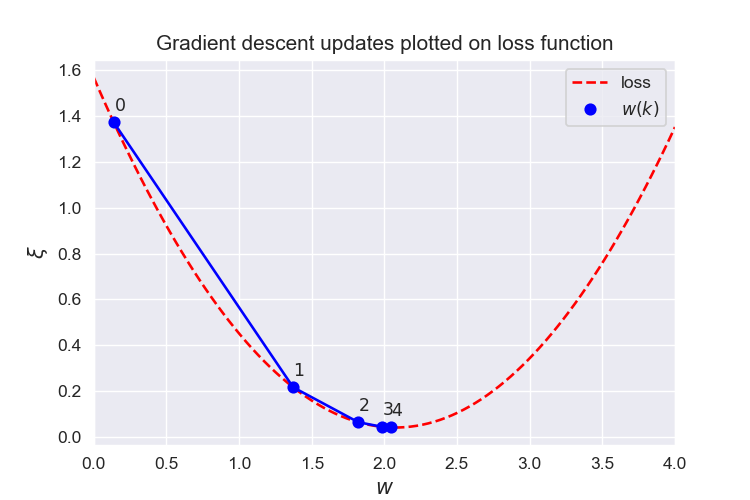

In [7]:
# Visualise the gradient descent updates
plt.figure(figsize=(6, 4))
plt.plot(ws, loss_ws, 'r--', label='loss')  # Loss curve
# Plot the updates
for i in range(0, len(w_loss)-1):
    w1, c1 = w_loss[i]
    w2, c2 = w_loss[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.05, f'${i}$')
plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2, c2+0.05, f'${i+1}$')
# Show figure
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('Gradient descent updates plotted on loss function')
plt.xlim(0, 4)
plt.legend(loc=1)
plt.show()


### 6.2 Gradient descent updates

The last figure shows the gradient descent updates of the weight parameters for 2 iterations. The blue dots represent the
weight parameter values at iteration . Notice how the update differs from the position of the weight and the gradient
at that point. The first update takes a much larger step than the second update because the gradient at is much
larger than the gradient at .
The regression line fitted by gradient descent with 10 iterations is shown in the figure below. The fitted line (red) lies close
to the original line (blue), which is what we tried to approximate via the noisy samples. Notice that both lines go through
point , this is because we didn't have a bias term, which represents the intercept, the intercept at is thus
.

In [8]:
w = np.random.rand()
# Start performing the gradient descent updates
nb_of_iterations = 10  # number of gradient descent updates
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)  # get the delta w update
    w = w - dw  # update the current weight parameter


<IPython.core.display.Javascript object>


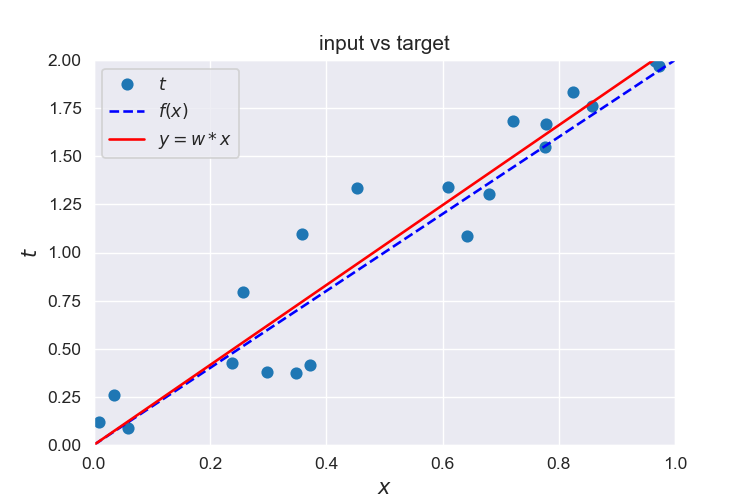

In [9]:
# Plot the fitted line agains the target line
plt.figure(figsize=(6, 4))
# Plot the target t versus the input x
plt.plot(x, t, 'o', label='$t$')
# Plot the initial line
plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
# plot the fitted line
plt.plot([0, 1], [0*w, 1*w], 'r-', label='$y = w * x$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.title('input vs target')
plt.legend(loc=2)
plt.ylim(0, 2)
plt.xlim(0, 1)
plt.show()

### 7. Analysis and Conclusion4 Conclusion

This experiment is a good starting point to how you can create a histogram using matplotlib with the help of numpy and pandas.